In [1]:
import numpy as np
from matplotlib import pyplot as plt, rc
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
rc('animation', html='jshtml')

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

from ipywidgets import IntProgress
from IPython.display import display

## Parameters

In [2]:
# Size
length = 50            # m
width = 9              # m

# # Descent engine characteristics (only 3 engines have been seen working so far)
v_exhaust = 3*3280     # m/s exhaust velocity at sea level. 3 sea level + 3 vacuum engines. 3750 at vacuum

Generating Animation


IntProgress(value=0, max=101)

(100, 6) (100, 2)


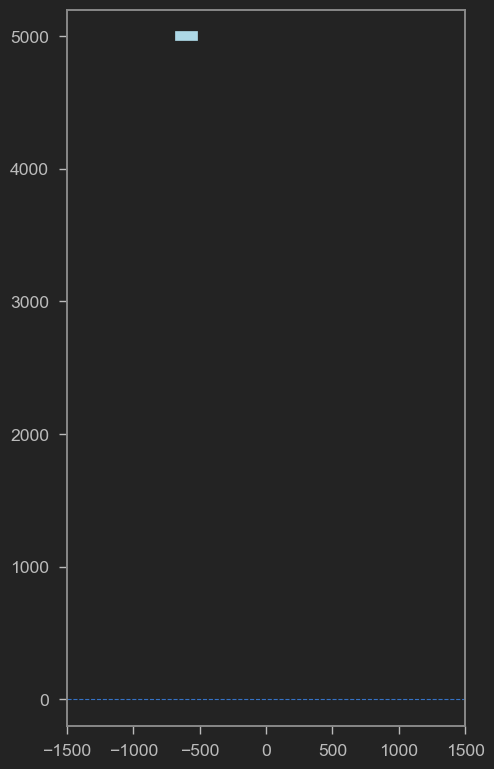

In [3]:
print("Generating Animation")
steps = 100 + 1
final_time_step = round(1/steps,2)
f = IntProgress(min = 0, max = steps)
display(f)

x_t = np.load('state_vector.npy')
u_t = np.load('control_vector.npy')
print(x_t.shape, u_t.shape)

fig = plt.figure(figsize = (5,8), constrained_layout=False)
ax1 = fig.add_subplot(111)
plt.axhline(y=0., color='b', linestyle='--', lw=0.8)

ln6, = ax1.plot([], [], '--', linewidth = 2, color = 'orange') # trajectory line
ln2, = ax1.plot([], [], linewidth = 2, color = 'tomato') # thrust line
ln1, = ax1.plot([], [], linewidth = 7, color = 'lightblue') # rocket body

plt.tight_layout()

ax1.set_xlim(-1500, 1500)
ax1.set_ylim(-200, 5200)
ax1.set_aspect(1)  # aspect of the axis scaling, i.e. the ratio of y-unit to x-unit

def update(i):
    rocket_theta = x_t[i, 4]

    rocket_x = x_t[i, 0]
    # length/1 is just to make rocket bigger in animation
    rocket_x_points = [rocket_x + length/1 * np.sin(rocket_theta), rocket_x - length/1 * np.sin(rocket_theta)]

    rocket_y = x_t[i, 2]
    rocket_y_points = [rocket_y + length/1 * np.cos(rocket_theta), rocket_y - length/1 * np.cos(rocket_theta)]

    ln1.set_data(rocket_x_points, rocket_y_points)

    thrust_mag = u_t[i, 0]
    thrust_angle = -u_t[i, 1]

    flame_length = (thrust_mag) * (0.4/v_exhaust)
    flame_x_points = [rocket_x_points[1], rocket_x_points[1] + flame_length * np.sin(thrust_angle - rocket_theta)]
    flame_y_points = [rocket_y_points[1], rocket_y_points[1] - flame_length * np.cos(thrust_angle - rocket_theta)]

    ln2.set_data(flame_x_points, flame_y_points)
    ln6.set_data(x_t[:i, 0], x_t[:i, 2])

    f.value += 1

playback_speed = 6500 # the higher the slower 
anim = FuncAnimation(fig, update, np.arange(0, steps-1, 1), interval= final_time_step * playback_speed)

anim

In [6]:
# anim.save('~/Downloads/rocket_landing.avi')

C:\Users\slinp\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


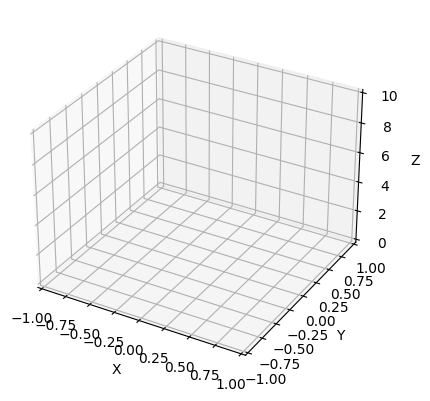

<Figure size 640x480 with 0 Axes>

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def gen(n):
    phi = 0
    while phi < 2*np.pi:
        yield np.array([np.cos(phi), np.sin(phi), phi])
        phi += 2*np.pi/n

def update(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

N = 100
data = np.array(list(gen(N))).T
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])

# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)
#ani.save('matplot003.gif', writer='imagemagick')
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Generating Animation


IndexError: list index out of range

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001D8400E7520> (for post_execute):


ValueError: too many values to unpack (expected 2)

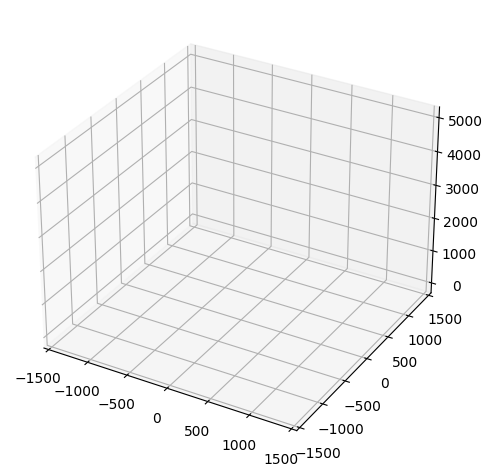

In [13]:
print("Generating Animation")
steps = 100 + 1
final_time_step = round(1/steps,2)

x_t = np.load('state_vector.npy')
u_t = np.load('control_vector.npy')

fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')


ln6, = ax1.plot([], [], [], '--', linewidth = 2, color = 'orange') # trajectory line
ln2, = ax1.plot([], [], [], linewidth = 2, color = 'tomato') # thrust line
ln1, = ax1.plot([], [], [], linewidth = 7, color = 'lightblue') # rocket body

plt.tight_layout()

ax1.set_xlim3d(-1500, 1500)
ax1.set_ylim3d(-1500, 1500)
ax1.set_zlim3d(-200, 5200)

def update(i):
    rocket_theta = x_t[i, 4]

    rocket_x = x_t[i, 0]
    # length/1 is just to make rocket bigger in animation
    rocket_x_points = [rocket_x + length/1 * np.sin(rocket_theta), rocket_x - length/1 * np.sin(rocket_theta)]

    rocket_y = x_t[i, 2]
    rocket_y_points = [rocket_y + length/1 * np.cos(rocket_theta), rocket_y - length/1 * np.cos(rocket_theta)]

    ln1.set_data(rocket_x_points, rocket_x_points, rocket_y_points)
    ln1.set_3d_properties(rocket_x_points, rocket_x_points, rocket_y_points)

    thrust_mag = u_t[i, 0]
    thrust_angle = -u_t[i, 1]

    flame_length = (thrust_mag) * (0.4/v_exhaust)
    flame_x_points = [rocket_x_points[1], rocket_x_points[1] + flame_length * np.sin(thrust_angle - rocket_theta)]
    flame_y_points = [rocket_y_points[1], rocket_y_points[1] - flame_length * np.cos(thrust_angle - rocket_theta)]

    ln2.set_data(flame_x_points, flame_x_points, flame_y_points)
    ln2.set_3d_properties(flame_x_points, flame_x_points, flame_y_points)
    
    ln6.set_data(x_t[:i, 0], x_t[:i, 0], x_t[:i, 2])
    ln6.set_3d_properties(x_t[:i, 0], x_t[:i, 0], x_t[:i, 2])
    
playback_speed = 6500 # the higher the slower 
anim = animation.FuncAnimation(fig, update, np.arange(0, steps-1, 1), interval= final_time_step * playback_speed)
anim.save('matplot3.gif', writer='imagemagick')
